# Ejercicio Voluntario de Pandas  
Por José Antonio Rangel Sosa  
**Immune Technology Institute**  
Mar-2023

## Datos

Para este ejercicio se ha seleccionado un conjunto de datos proporcionado por la Comunidad de Madrid con las concentraciones de polen atmosférico por cada uno de los 25 tipos polínicos que se identifican en la Red Palinológica de la Comunidad de Madrid.  
Enlaces web principales:  
https://datos.comunidad.madrid/catalogo/dataset/mediciones_polen  
https://www.comunidad.madrid/servicios/salud/polen  

Enlace set de datos: https://datos.comunidad.madrid/catalogo/dataset/7bc9d9fd-16ec-4ce9-aa21-91ca0254d06e/resource/8285490e-3e65-4617-8240-c808e37c3933/download/mediciones_polen.json  

  
Como se explica en la web de la Comunidad de Madrid, los datos no son cargados automáticamente en la plataforma; proceden de un análisis manual realizado a través de microspcopía óptica y de una carga de datos manual. Los datos diarios se expresan como granos de polen y están referidos a m3 de aire.  
  
Los datos proivienen de un total de 11 captadoras:  
1. ALCA (Alcalá de Henares)
2. ALCO (Alcobendas)
3. ALER (Madrid - Barrio de Salamanca)
4. ARAN (Aranjuez)
5. AYTM (Madrid - Arganzuela)
6. COSL (Coslada)
7. FACF (Madrid - Ciudad Universitaria)
8. GETA (Getafe)
9. LEGA (Leganes, **fuera de servicio**)
10. ROZA (Las Rozas)
11. VILL (Collado Villalba)  
  
Los tipos polínicos que se encuentran en el set de datos son los siguientes:  
1. Abedul
2. Aligustre
3. Aliso
4. Arce
5. Artemisia
6. Castaño
7. Compuestas
8. Corylus
9. Cupresáceas/Taxáceas
10. Ericaceae
11. Eucalipto
12. Fresno
13. Gramíneas
14. Moreras
15. Olivo
16. Olmos
17. Otros
18. Pinos
19. Plantago
20. Plátano de paseo
21. PNI (Polen no identificado)
22. Populus
23. Quenopodiáceas/Amarantáceas
24. Quercus
25. Rumex (Acederas)
26. Sauces
27. Urticaceae (Ortigas)  

## Lectura de Datos

In [ ]:
import pandas as pd

Lectura del fichero json de la web

In [ ]:
df_polen_Madrid_web = (
    pd.read_json("https://datos.comunidad.madrid/catalogo/dataset/7bc9d9fd-16ec-4ce9-aa21-91ca0254d06e/resource/8285490e-3e65-4617-8240-c808e37c3933/download/mediciones_polen.json")
)

## Exploración de datos

Verificación del dataframe

In [ ]:
df_polen_Madrid_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20439 entries, 0 to 20438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    20439 non-null  object
dtypes: object(1)
memory usage: 159.8+ KB


Se verifica que con el método **normalize** se puede transformar el diccionario proveniente de json a dataframe:

In [ ]:
pd.json_normalize(df_polen_Madrid_web['data']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20439 entries, 0 to 20438
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   captador                        20439 non-null  object
 1   fecha_lectura                   20439 non-null  object
 2   tipo_polinico                   20439 non-null  object
 3   granos_de_polen_x_metro_cubico  20439 non-null  object
dtypes: object(4)
memory usage: 638.8+ KB


## Limpieza

Se normaliza el dataframe

In [ ]:
df_polen_Madrid = pd.json_normalize(df_polen_Madrid_web['data'])

Se verifican las primeras y últimas filas del dataset

In [ ]:
df_polen_Madrid.head()

,captador,fecha_lectura,tipo_polinico,granos_de_polen_x_metro_cubico
0,ALCA,2022-12-31 00:00:00,Abedul,0
1,ALCA,2022-12-31 00:00:00,Aligustre,0
2,ALCA,2022-12-31 00:00:00,Aliso,1
3,ALCA,2022-12-31 00:00:00,Arce,0
4,ALCA,2022-12-31 00:00:00,Artemisia,0


In [ ]:
df_polen_Madrid.tail()

,captador,fecha_lectura,tipo_polinico,granos_de_polen_x_metro_cubico
20434,VILL,2023-03-05 00:00:00,Quenopodiáceas/Amarantáceas,0
20435,VILL,2023-03-05 00:00:00,Quercus,10
20436,VILL,2023-03-05 00:00:00,Rumex (Acederas),1
20437,VILL,2023-03-05 00:00:00,Sauces,0
20438,VILL,2023-03-05 00:00:00,Urticaceae (Ortigas),2


Se ajusta la columna de fechas al formato correpondiente

In [ ]:
df_polen_Madrid = df_polen_Madrid.assign(
    fecha_lectura = lambda dataset : pd.to_datetime(dataset.fecha_lectura)
) 

Se verifica el dataset

In [ ]:
df_polen_Madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20439 entries, 0 to 20438
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   captador                        20439 non-null  object        
 1   fecha_lectura                   20439 non-null  datetime64[ns]
 2   tipo_polinico                   20439 non-null  object        
 3   granos_de_polen_x_metro_cubico  20439 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 638.8+ KB


In [ ]:
df_polen_Madrid.head()

,captador,fecha_lectura,tipo_polinico,granos_de_polen_x_metro_cubico
0,ALCA,2022-12-31,Abedul,0
1,ALCA,2022-12-31,Aligustre,0
2,ALCA,2022-12-31,Aliso,1
3,ALCA,2022-12-31,Arce,0
4,ALCA,2022-12-31,Artemisia,0


Se verifica un valor tipo fecha para corroborar la conversión

In [ ]:
df_polen_Madrid['fecha_lectura'][0]

Timestamp('2022-12-31 00:00:00')

Se verifica la cantidad total de registros

In [ ]:
df_polen_Madrid.groupby("captador").count()

,fecha_lectura,tipo_polinico,granos_de_polen_x_metro_cubico
captador,,,
ALCA,1755,1755,1755
ALCO,1836,1836,1836
ALER,1944,1944,1944
ARAN,1755,1755,1755
AYTM,1944,1944,1944
COSL,1890,1890,1890
FACF,1944,1944,1944
GETA,1917,1917,1917
LEGA,1755,1755,1755


En un intento previo por convertir a entero la columna **granos_de_polen_x_metro_cubico**, se generó un error debido a la presencia de valores vacíos (""). Se procede a verificar

In [ ]:
df_polen_Madrid.query("granos_de_polen_x_metro_cubico == ''").groupby("captador").count()

,fecha_lectura,tipo_polinico,granos_de_polen_x_metro_cubico
captador,,,
ALCA,54,54,54
AYTM,351,351,351
COSL,54,54,54
FACF,162,162,162
GETA,54,54,54
LEGA,1755,1755,1755
VILL,432,432,432


Se procede de la siguiente manera:  
1. Para no eliminar filas, se convertirán los valores vacíos a '-1'. Se entiende de esta manera que valores negativos corresponden a data que originalmente no estaba disponible en el dataset.  
2. Se convierten los valores a entero

In [ ]:
def conv_blank(val):
  if val == '':
    new_val = '-1'
  else:
    new_val = val
  return int(new_val)

In [ ]:
df_polen_Madrid = df_polen_Madrid.assign(
    granos_de_polen_x_metro_cubico = 
    lambda dataset : dataset.granos_de_polen_x_metro_cubico.map(conv_blank)
)

## Verificación de datos

Se verifica el dataset y los diferentes tipos de valores contenidos en la columna **granos_de_polen_x_metro_cubico**

In [ ]:
df_polen_Madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20439 entries, 0 to 20438
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   captador                        20439 non-null  object        
 1   fecha_lectura                   20439 non-null  datetime64[ns]
 2   tipo_polinico                   20439 non-null  object        
 3   granos_de_polen_x_metro_cubico  20439 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 638.8+ KB


In [ ]:
df_polen_Madrid.groupby("granos_de_polen_x_metro_cubico").count()

,captador,fecha_lectura,tipo_polinico
granos_de_polen_x_metro_cubico,,,
-1,2862,2862,2862
0,13345,13345,13345
1,1508,1508,1508
2,606,606,606
3,357,357,357
...,...,...,...
1605,1,1,1
1748,1,1,1
1824,1,1,1


## Visualización de datos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

A modo de prueba, se visualizan los datos del captador de Alcorcon (**ALCO**)

In [ ]:
df_prueba = df_polen_Madrid.query("captador == 'ALCO' and granos_de_polen_x_metro_cubico != -1")

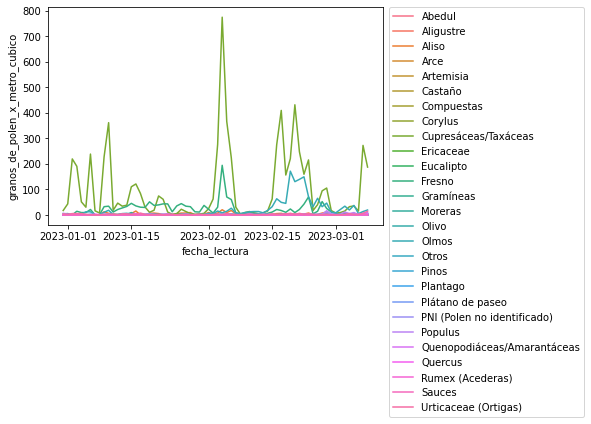

In [ ]:
sns.lineplot(data=df_prueba,
             x="fecha_lectura",
             y=df_prueba['granos_de_polen_x_metro_cubico'],
             hue='tipo_polinico')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Se presentan todos los datos, utilizando un gráfico por cada captador

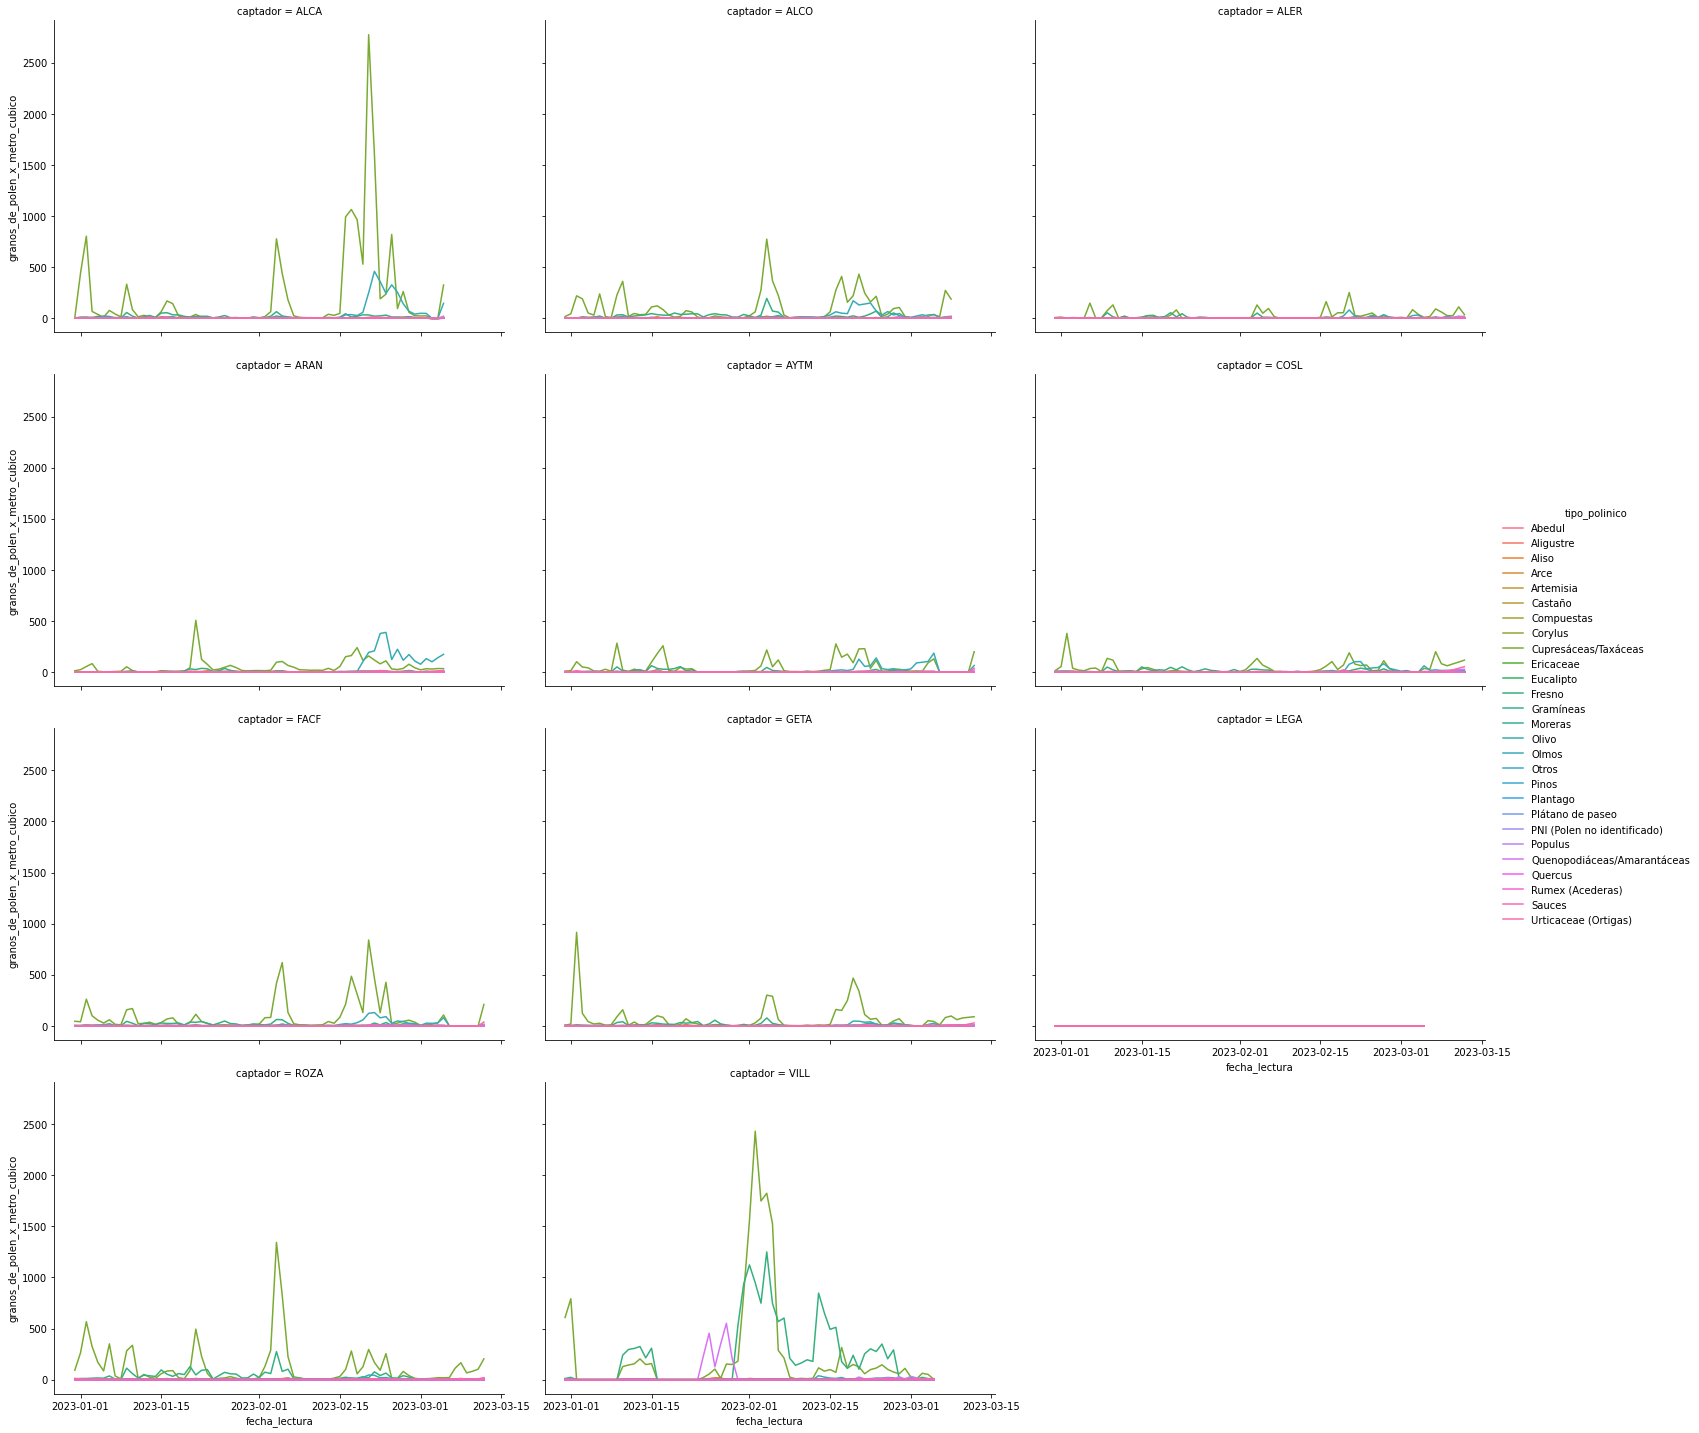

In [ ]:
sns.relplot(
    data=df_polen_Madrid,
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="tipo_polinico",
    col="captador",
    col_wrap=3,
    kind="line",
    height=5,
    aspect=1.4,
);

Se presentan de forma separada los datos de captadores con valores altos respecto a los que tienen valores más bajos

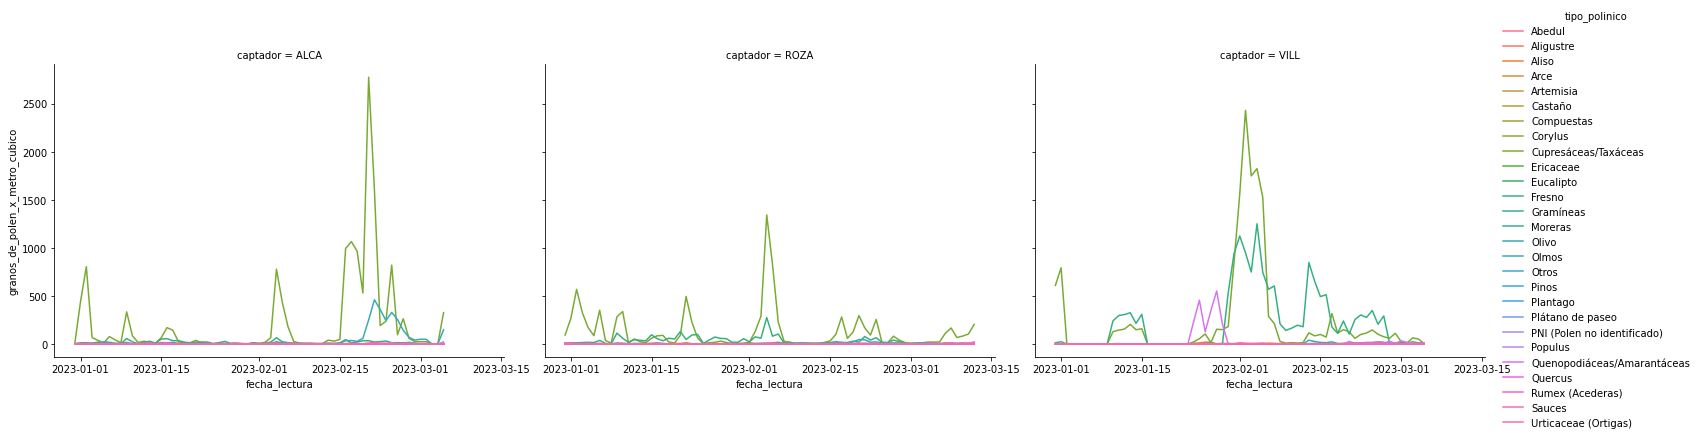

In [ ]:
sns.relplot(
    data=df_polen_Madrid.query("captador == 'ALCA' or captador == 'VILL'\
                              or captador == 'ROZA'"),
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="tipo_polinico",
    col="captador",
    col_wrap=3,
    kind="line",
    height=5,
    aspect=1.4,
);

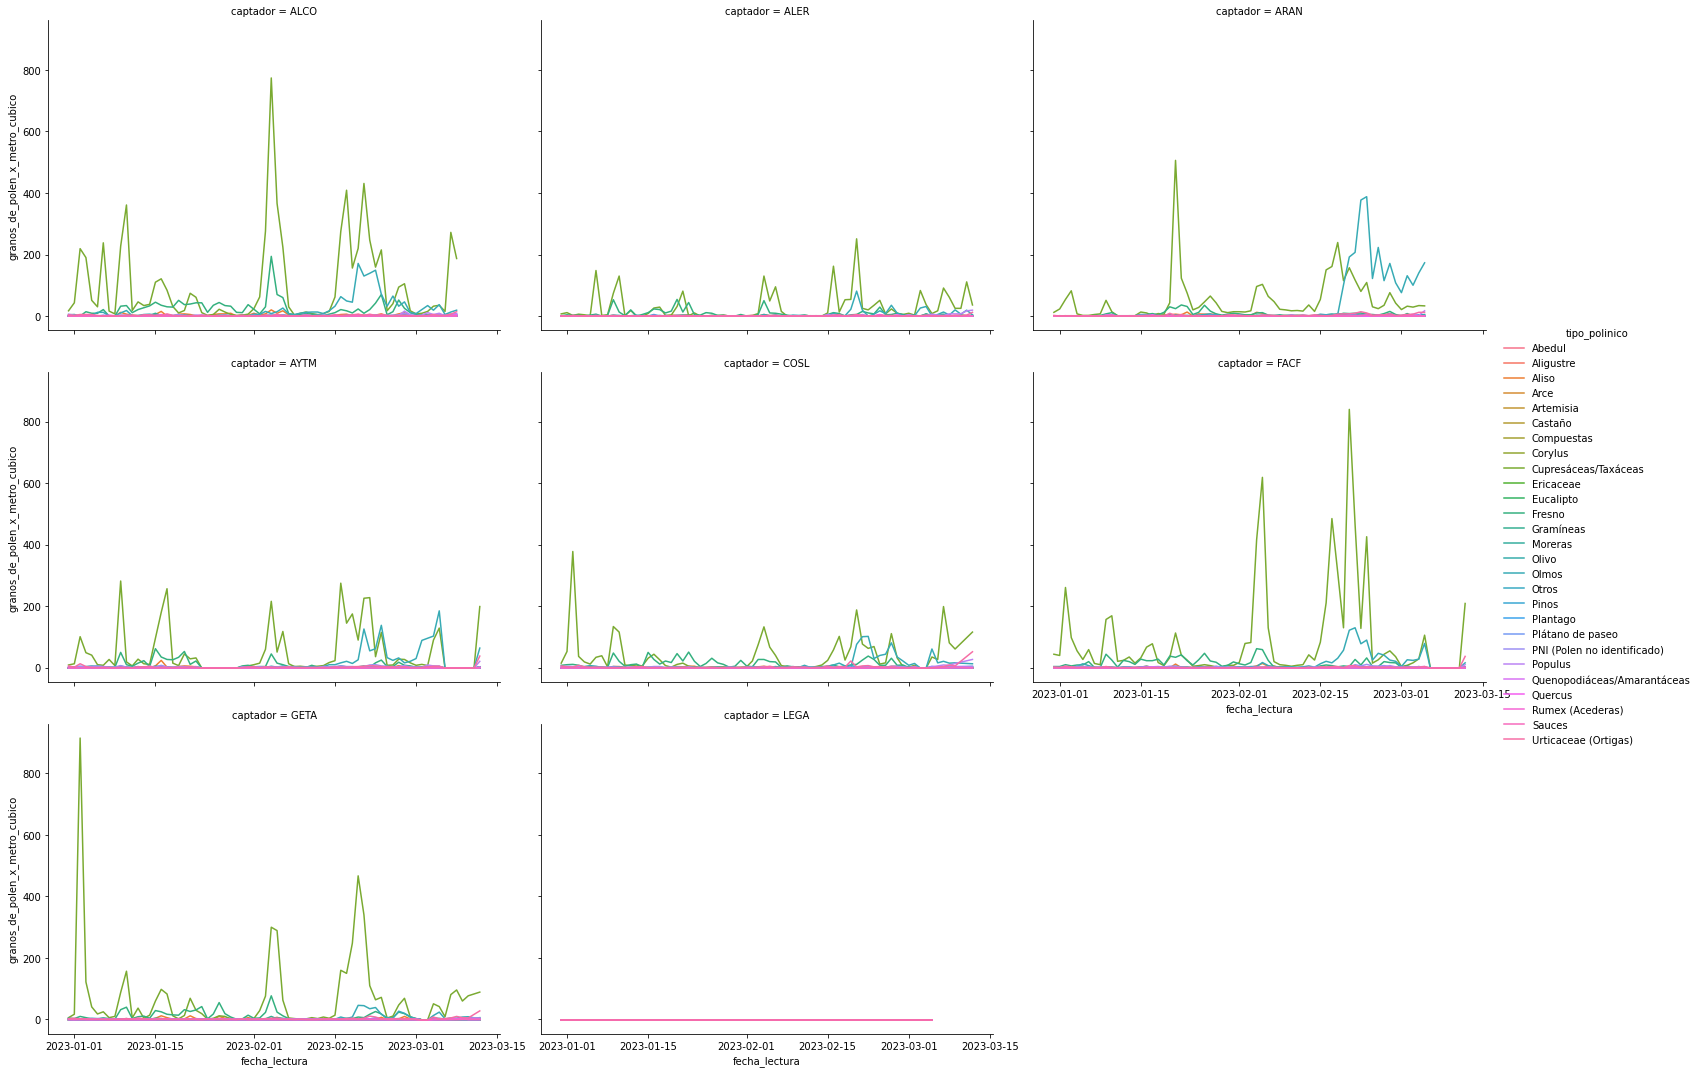

In [ ]:
sns.relplot(
    data=df_polen_Madrid.query("captador != 'ALCA' and captador != 'VILL'\
                              and captador != 'ROZA'"),
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="tipo_polinico",
    col="captador",
    col_wrap=3,
    kind="line",
    height=5,
    aspect=1.4,
    #palette='viridis'
    #dashes=True
    markers=True
);

Se presentan los datos, utilizando un gráfico por cada tipo polínico

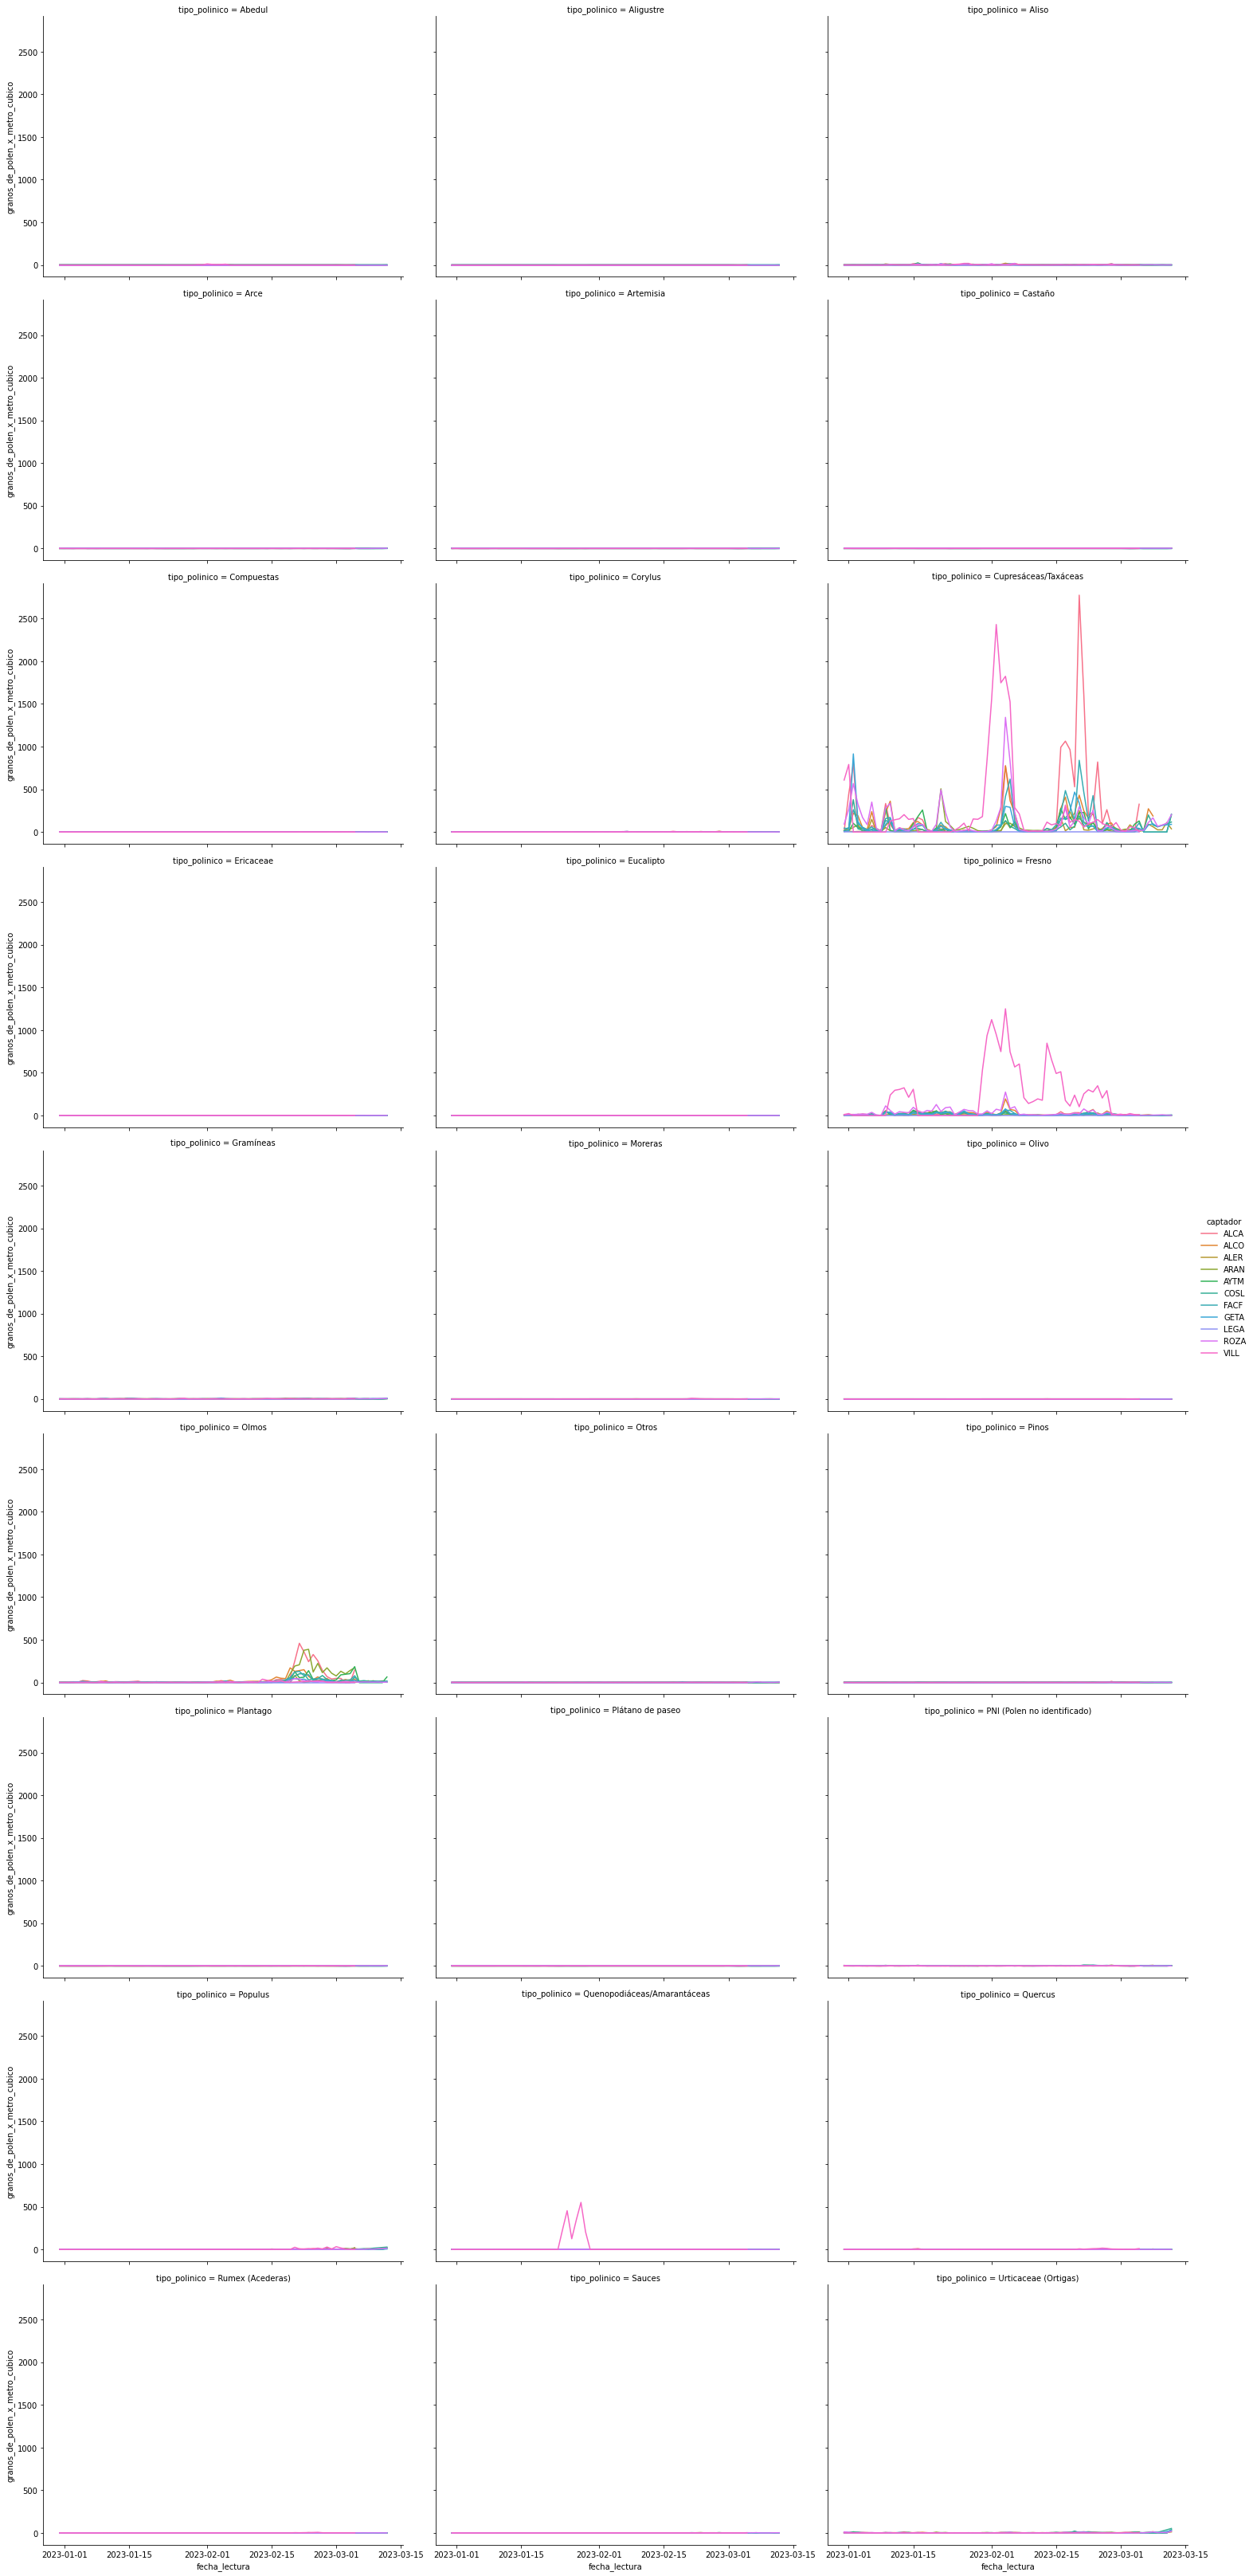

In [ ]:
sns.relplot(
    data=df_polen_Madrid,
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="captador",
    col="tipo_polinico",
    col_wrap=3,
    kind="line",
    height=5,
    aspect=1.4,
);

Se presentan de forma separada los datos de tipos polínicos con valores altos respecto a los que tienen valores más bajos

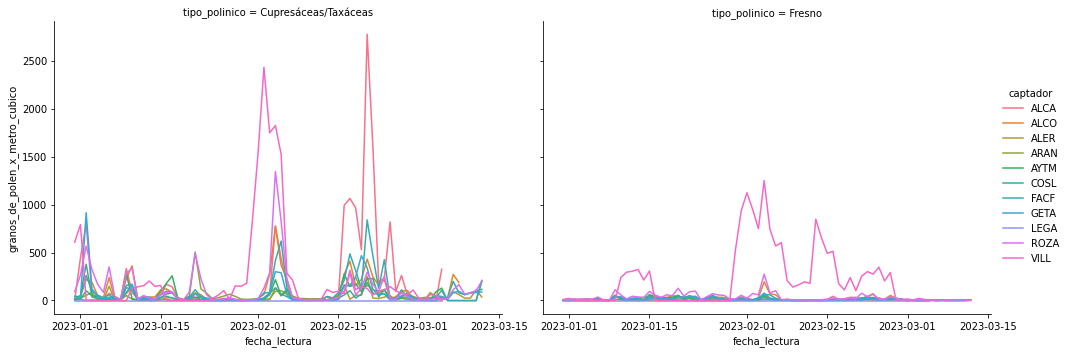

In [ ]:
sns.relplot(
    data=df_polen_Madrid.query("tipo_polinico == 'Cupresáceas/Taxáceas'\
                              or tipo_polinico == 'Fresno'"),
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="captador",
    col="tipo_polinico",
    col_wrap=2,
    kind="line",
    height=5,
    aspect=1.4,
);

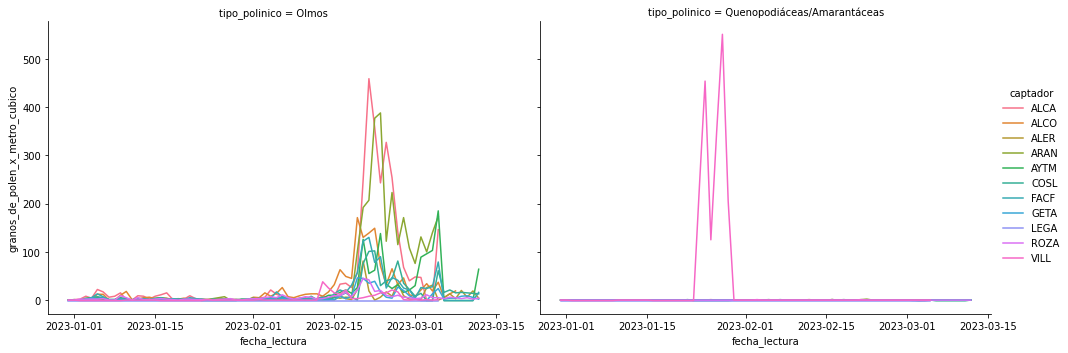

In [ ]:
sns.relplot(
    data=df_polen_Madrid.query("tipo_polinico == 'Quenopodiáceas/Amarantáceas'\
                              or tipo_polinico == 'Olmos'"),
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="captador",
    col="tipo_polinico",
    col_wrap=2,
    kind="line",
    height=5,
    aspect=1.4,
);

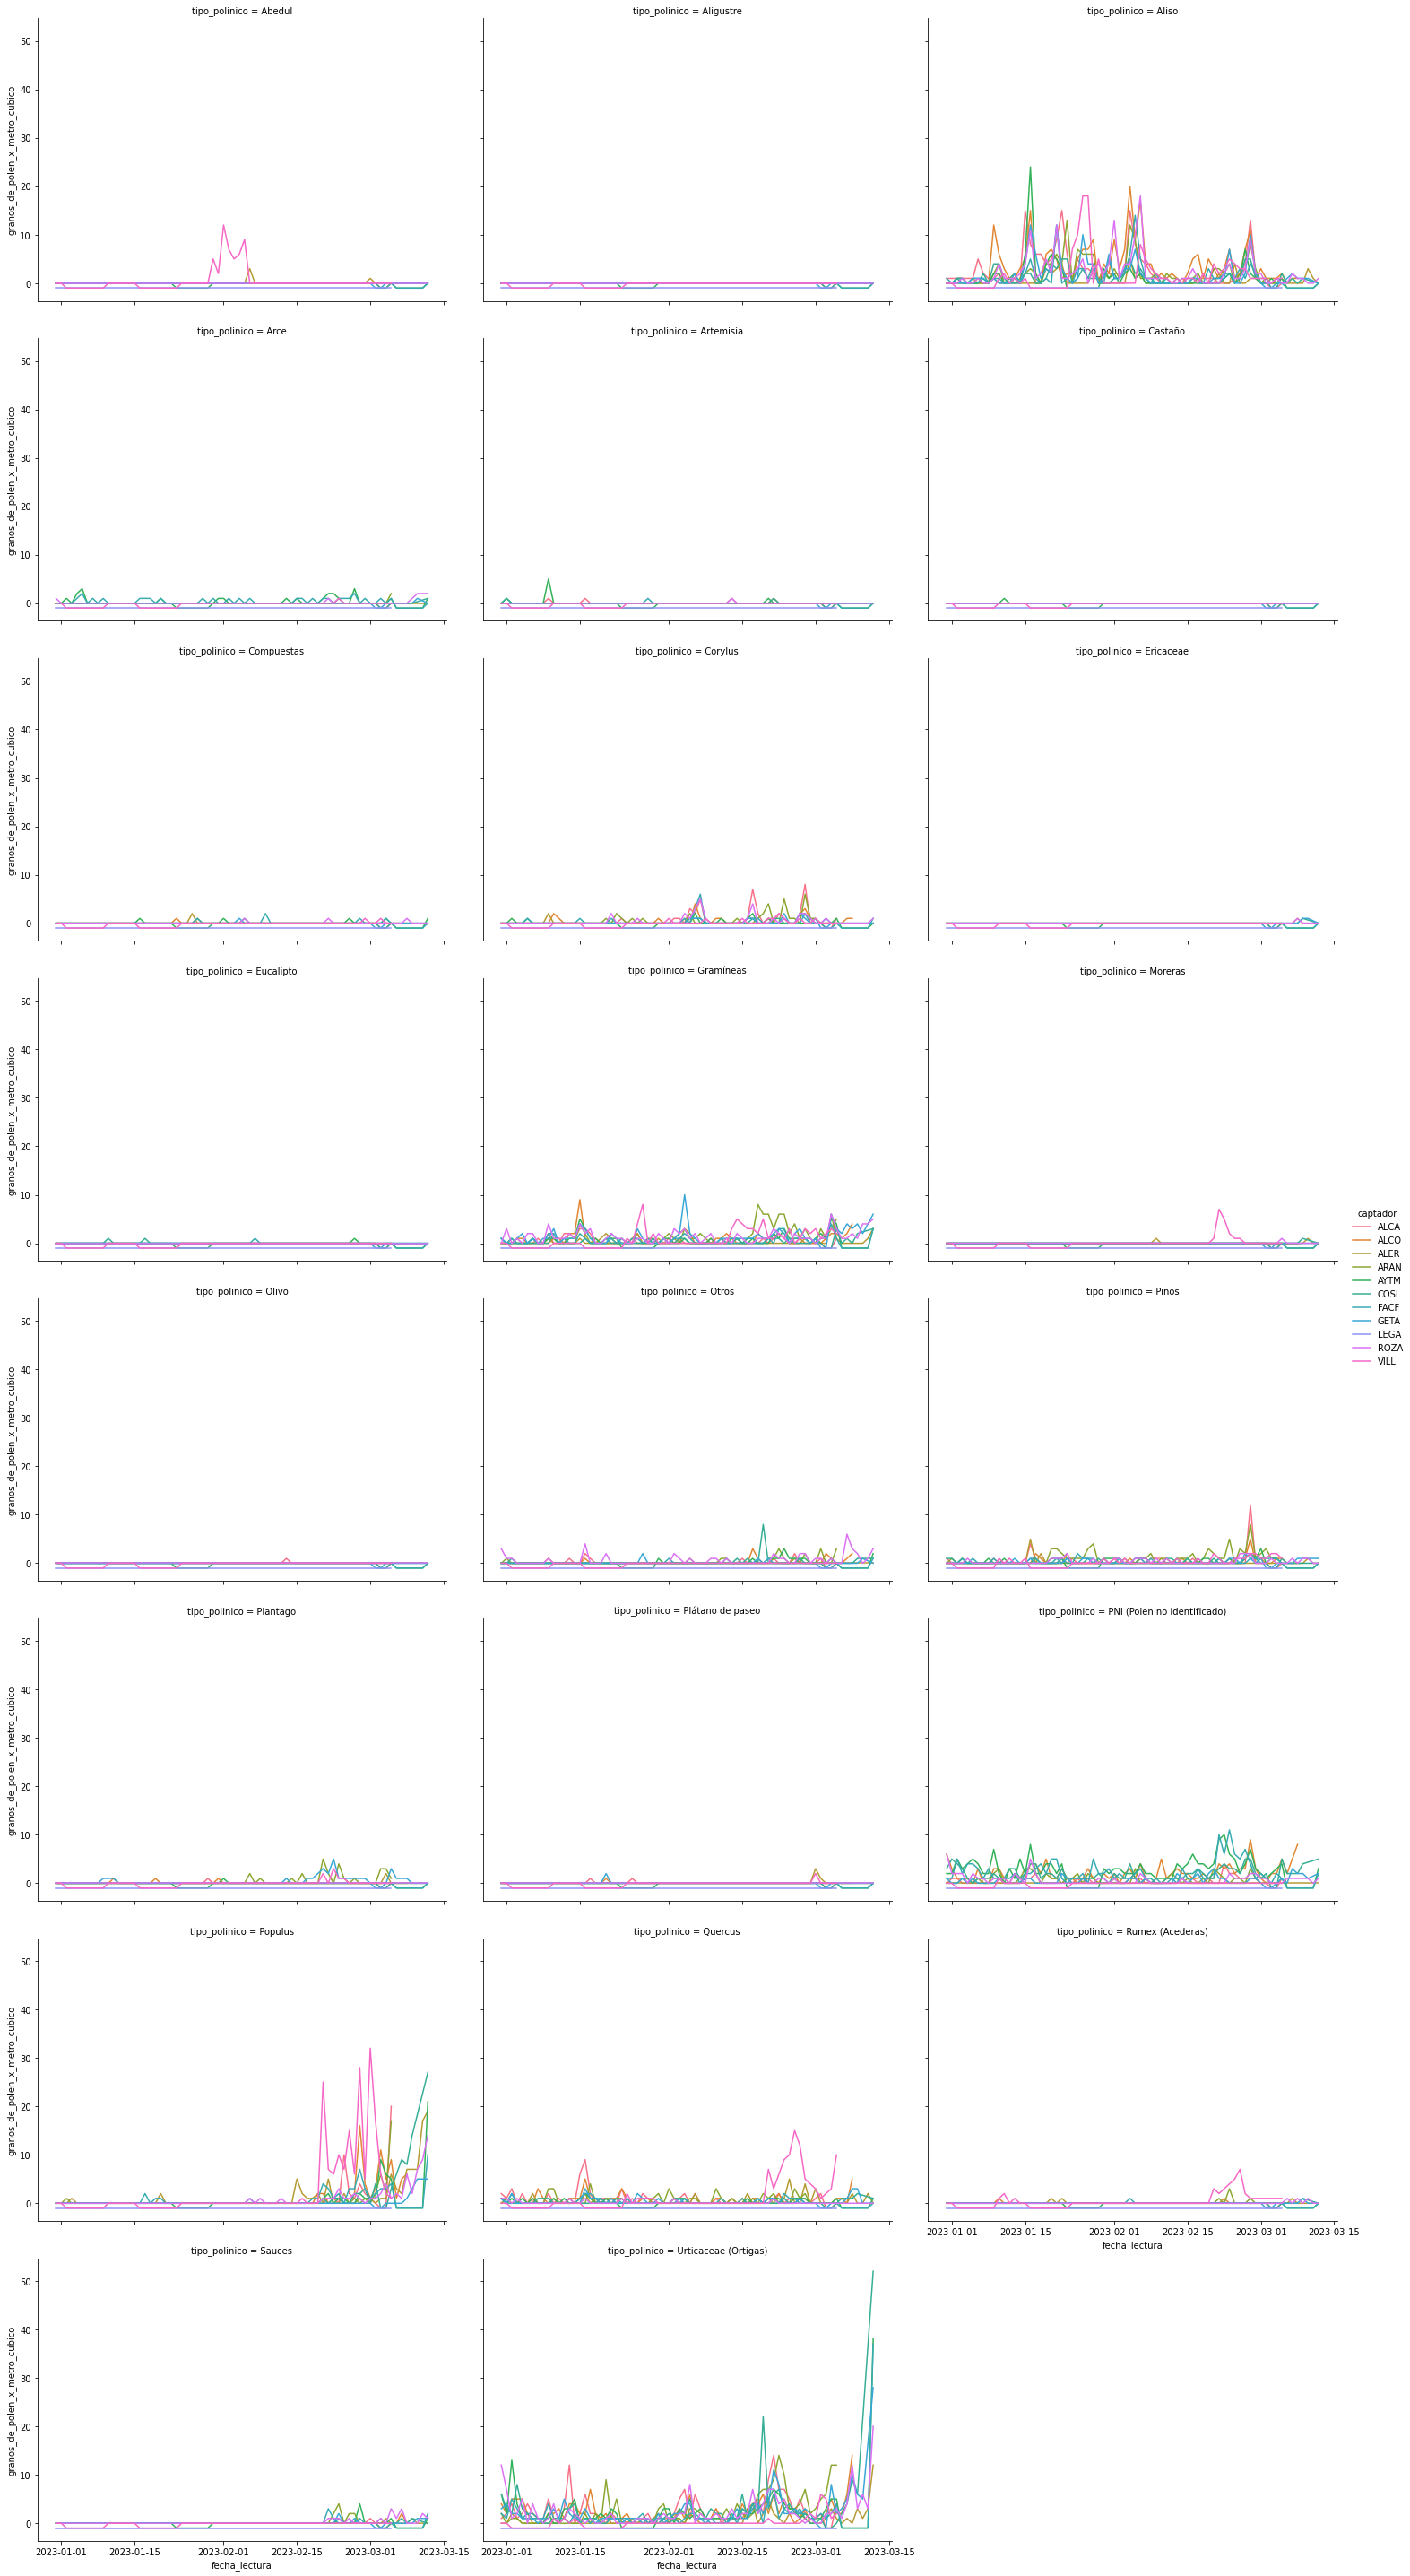

In [ ]:
sns.relplot(
    data=df_polen_Madrid.query("tipo_polinico != 'Quenopodiáceas/Amarantáceas'\
                              and tipo_polinico != 'Olmos'\
                              and tipo_polinico != 'Cupresáceas/Taxáceas'\
                              and tipo_polinico != 'Fresno'"),
    x="fecha_lectura",
    y="granos_de_polen_x_metro_cubico",
    hue="captador",
    col="tipo_polinico",
    col_wrap=3,
    kind="line",
    height=5,
    aspect=1.4,
);

Observaciones resaltantes de la visualización de datos:  
1. Se confirma que el captador de Leganés está fuera de servicio.  
2. Se confirma los altos niveles de los tipos polínicos típicos de invierno en la Comunidad de Madrid: Cupresáceas/Taxáceas y Fresno.  